In [25]:
from kmodes.kmodes import KModes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Read the CSV file into a pandas dataframe
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [27]:
wcss = []
for i in range(1,11):
    kmodes = KModes(n_clusters=i)
    kmodes.fit_predict(X)
    wcss.append(kmodes.cost_)

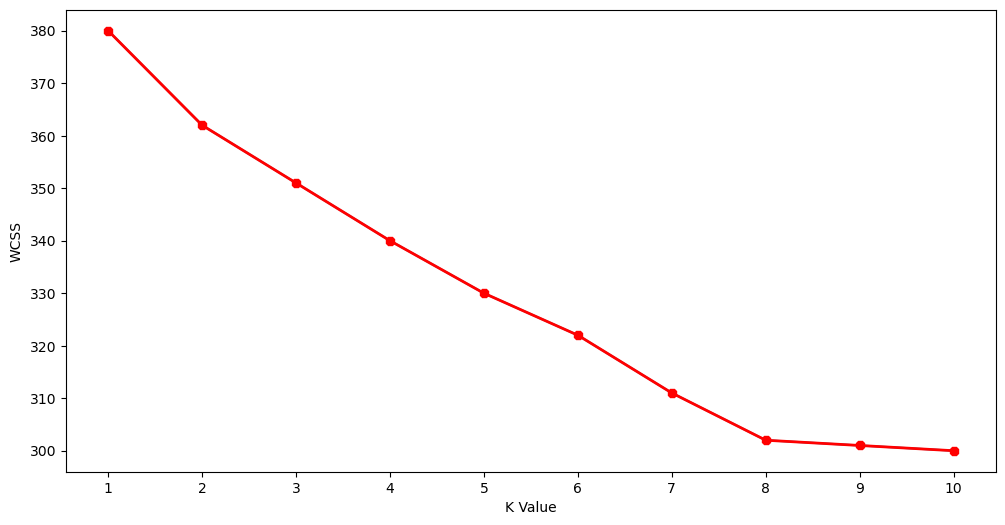

In [28]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [29]:
kmodes1 = KModes(n_clusters=8)
kmodes1.fit_predict(X)
y= kmodes1.predict(X)
df["label"]=y
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


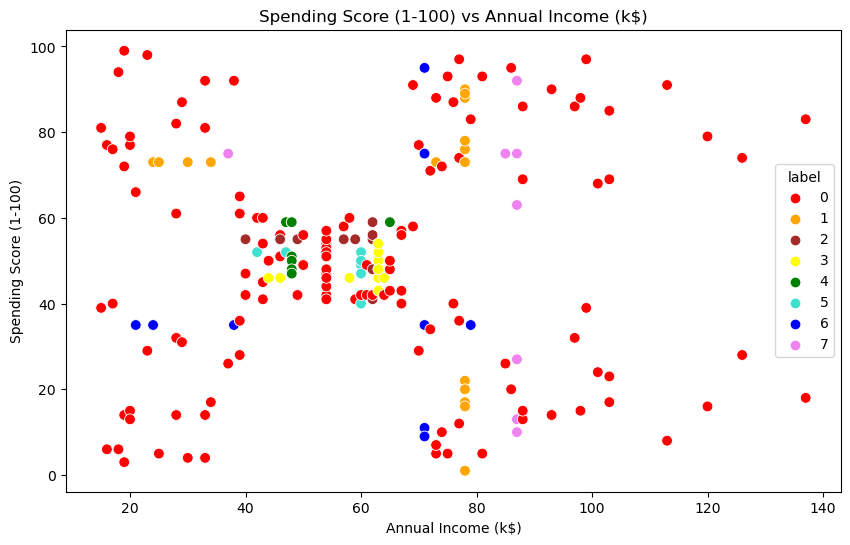

In [31]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label", palette= [ 'red', 'orange', 'Brown', 'Yellow', 'Green', 'Turquoise', 'Blue', 'Violet']
                  ,legend='full',data = df  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()